# Intro to tensorflow

### Load dependencies

In [1]:
import numpy as  np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
tf.set_random_seed(42)

/opt/conda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


#### Create a simple data set
Define two arrays for the X and Y axes

In [2]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] # feature (independent variable)
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.] # labels (dependent variable)

Plot the data that we will try to learn from, to find the regression line.

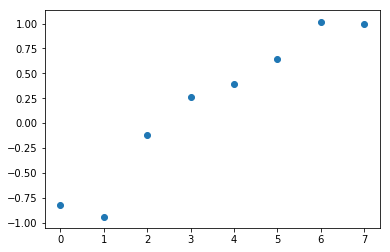

In [3]:
fig,ax = plt.subplots()
_=ax.scatter(xs,ys)

## Define variables
The variable we try to learn are the slopes. The slope of the line is positive as we can see from the graph above, but to do not cheat we will set a -.5 to simulate we have no assumption about the data. The y intercept is aroung -1.

In [4]:
m = tf.Variable(-0.5)
b= tf.Variable(1.0)

## Define cost function
Use quadratic to get rid of negative numbers and also to make bigger error more impactful.
Recall zip in python is an iterator where the i-th tuple contains the i-th element from each of the argument iterables: x and y. So here is it used to loop over the two arrays, which have the same dimension. 

In [5]:
total_error =0.0
for x,y in zip(xs,ys):
    y_model = m*x + b
    total_error += (y-y_model)**2

### Define optimizer
The optimizer is used to assess the cost function. So use the gradient descend with a slow learning rage and the goal is to minimize the error.

In [6]:
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error) 
# illustrate learning rate too high: 
# optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(total_error) 
# optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(total_error) 

### Define initializer

In [7]:
initializer_operation = tf.global_variables_initializer()

#### Execute session

In [13]:
with tf.Session() as session:
    session.run(initializer_operation)
    n_epochs = 1000
    for i in range(n_epochs):
        session.run(optimizer_operation)
    slope, intercept = session.run([m,b])

In [14]:
slope

0.29314372

In [15]:
intercept

-0.84175235

In [17]:
y_hat = intercept + slope * np.array(xs)

In [19]:
pd.DataFrame(list(zip(ys,y_hat)),columns=['ys','y_hat'])

ys     y_hat
0 -0.82 -0.841752
1 -0.94 -0.548609
2 -0.12 -0.255465
3  0.26  0.037679
4  0.39  0.330823
5  0.64  0.623966
6  1.02  0.917110
7  1.00  1.210254

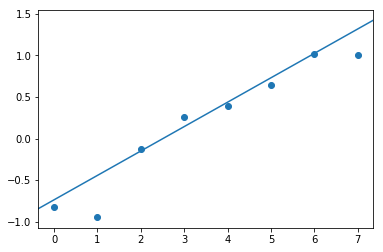

In [21]:
fig,ax = plt.subplots()
_=ax.scatter(xs,ys)
x_min,x_max=ax.get_xlim()
y_min,y_max=intercept,intercept + slope * (x_max-x_min)
ax.plot([x_min,x_max],[y_min,y_max])
_=ax.set_xlim([x_min,x_max])
